Predicting House price based on size of the house using Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('homeprices.csv')

In [4]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


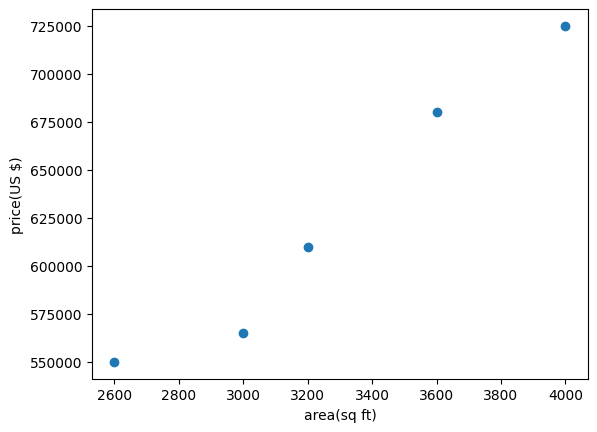

In [5]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)

In [7]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

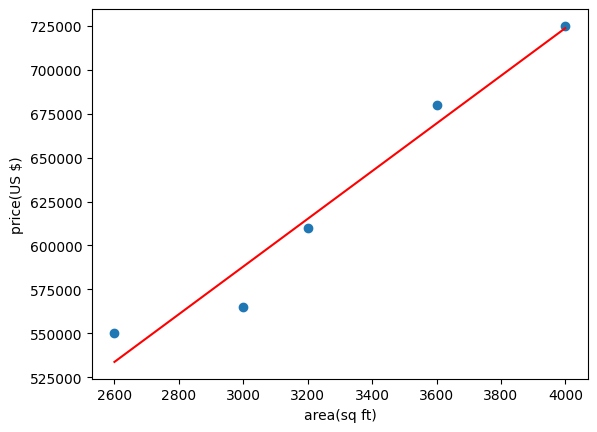

In [21]:
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price)
plt.plot(df.area,reg.predict(df[['area']]),color='red')

In [9]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

In [13]:
#Checking l=manually if the predicted value is same
print(135.78767123*3300+180616.43835616432)

628715.7534151643


In [31]:
#Predicting for multiple values
d=pd.read_csv('areas.csv')
p=reg.predict(d)
d['prices']=p

In [15]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2800,5.608219e+05


In [18]:
d.to_csv('predictions.csv',index=False)

In [30]:
#Finding Mean MSE for the Model
mse=cross_val_score(reg,df.iloc[:,:-1],df.iloc[:,-1],scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-578055116.1063812
